# Calculating probabilities


In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

get_path = './Datasets/amir_deals.csv'
amir = pd.read_csv(get_path)

In [2]:
# check
amir.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [3]:
# Count the deals for each product
counts = amir['product'].value_counts()
counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [4]:
"""
Calculate the probability of selecting a deal
for the different product types by dividing the counts
by the total number of deals Amir worked on. Save this as probs.
"""
probs = counts / len(amir)

# check
probs

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64

# Sampling deals


In [5]:
# Set the random seed to 24.
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir.sample(5)

# check
sample_without_replacement

,Unnamed: 0,product,client,status,amount,num_users
127,128,Product B,Current,Won,2070.25,7
148,149,Product D,Current,Won,3485.48,52
77,78,Product B,Current,Won,6252.30,27
104,105,Product D,Current,Won,4110.98,39
166,167,Product C,New,Lost,3779.86,11


In [6]:
# Set random seed
np.random.seed(24)

# Take a sample of 5 deals with replacement and save as sample_with_replacement.
sample_with_replacement = amir.sample(5, replace=True)

# check
sample_with_replacement

,Unnamed: 0,product,client,status,amount,num_users
162,163,Product D,Current,Won,6755.66,59
131,132,Product B,Current,Won,6872.29,25
87,88,Product C,Current,Won,3579.63,3
145,146,Product A,Current,Won,4682.94,63
145,146,Product A,Current,Won,4682.94,63


# Creating a probability distribution


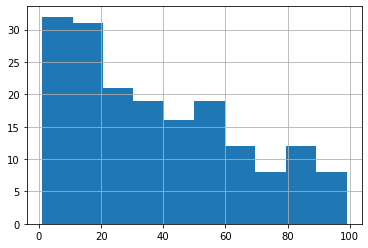

In [7]:
# Create a histogram of the num_users column of amir, setting bins to [2, 3, 4, 5, 6].
amir['num_users'].hist()

# display plot
plt.show()

In [8]:
"""
Count the number of users in amir deals,
then divide by the number of rows in amir deals to
calculate the probability of randomly selecting a group of number of users. 
Save as size_dist.
"""
users_dist = amir['num_users'].value_counts() / len(amir)

# Reset the index of size_dist.
users_dist = users_dist.reset_index()

# Rename the columns of size_dist to products and prob.
users_dist.columns = ["users", 'prob']

In [9]:
# check
users_dist

,users,prob
0,2,0.039326
1,17,0.039326
2,12,0.033708
3,23,0.028090
4,3,0.028090
...,...,...
74,98,0.005618
75,41,0.005618
76,40,0.005618
77,36,0.005618


In [10]:
"""
Calculate the expected value of the size_distribution,
which represents the expected number pf users,
by multiplying the num_users by the prob and taking the sum.
"""
expected_value = np.sum(users_dist['users'] * users_dist['prob'])

# check
expected_value

37.651685393258425

In [11]:
"""
Calculate the probability of randomly picking 10 or more
users by subsetting for 10 users or more 
and summing the probabilities of selecting those groups.
"""
users_10_or_more = users_dist[users_dist['users'] >= 10]

# check
users_10_or_more

,users,prob
1,17,0.039326
2,12,0.033708
3,23,0.028090
5,42,0.022472
6,29,0.022472
...,...,...
74,98,0.005618
75,41,0.005618
76,40,0.005618
77,36,0.005618


In [12]:
# Sum the probabilities of users_10_or_more
prob_10_or_more = np.sum(users_10_or_more['prob'])

# check
prob_10_or_more

0.8258426966292136

In [13]:
amir['num_users'].value_counts() / len(amir)

2     0.039326
17    0.039326
12    0.033708
23    0.028090
3     0.028090
        ...   
98    0.005618
41    0.005618
40    0.005618
36    0.005618
60    0.005618
Name: num_users, Length: 79, dtype: float64

# Data back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [14]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [15]:
"""
Import uniform from scipy.stats and calculate
the probability that Amirhas to wait less than 5 minutes,
and store in a variable called prob_less_than_5.
"""
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)

# check
prob_less_than_5

0.16666666666666666

In [16]:
"""
Calculate the probability that Amir has to wait
more than 5 minutes, and store in a variable called prob_greater_than_5.
"""
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)

# check
prob_greater_than_5

0.8333333333333334

In [17]:
"""
Calculate the probability that Amir has to wait between 10 and 20 minutes,
and store in a variable called prob_between_10_and_20.
"""
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)

# check
prob_between_10_and_20

0.3333333333333333

# Simulating wait times


In [18]:
# Set random seed to 334
np.random.seed(334)

"""
Generate 1000 wait times from the continuous uniform distribution
that models Amir's wait time. Save this as wait_times.
"""
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# check
wait_times

array([ 7.144097  ,  0.97455866,  3.72802787,  5.11644319,  8.70602482,
       24.69140099, 23.98012075,  3.19592668, 25.1985306 , 17.89048629,
       24.68695356, 18.27160808, 22.85829011,  0.12929581, 15.67789664,
        2.3262095 , 15.79151771, 21.90473557, 18.25817257, 15.78657023,
       28.74328434,  9.38971275, 17.0010565 ,  0.95433991, 15.96917606,
        2.16395679,  8.903302  , 19.24982156,  6.52414731, 14.10185677,
       27.86973455, 14.38121016, 28.59233824, 13.17550521, 22.96382405,
        2.52904371,  6.2163781 ,  8.40217036,  4.48079914, 28.16365298,
       19.73302715,  3.63959282,  1.74002295,  1.5324219 , 26.97096908,
       29.37490861,  4.71379092,  6.44990488,  6.81999564, 22.81302458,
       12.41563042, 11.14591581,  8.08043184, 29.60574053,  3.24571518,
       19.66709277, 13.38939302, 29.56433707, 24.84697258,  6.249684  ,
       15.07668579,  5.27474477, 27.27430815,  2.42084219, 27.88317515,
        0.81231424,  3.48564273, 19.80738592,  6.11128124, 19.10

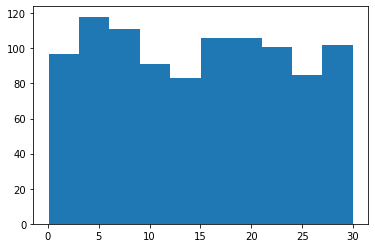

In [19]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

# Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [20]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

"""
Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
"""
# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

"""
Simulate a typical week of Amir's deals, or one week of 3 deals.
"""
print(binom.rvs(3, 0.3, size=1))

"""
Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
"""
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
0.8461538461538461


# Calculating binomial probabilities


In [21]:
"""
What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.
"""
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999982


In [22]:
"""
What's the probability that Amir closes 1 or fewer deals in a week?
Save this as prob_less_than_or_equal_1.
"""
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.7839999999999999


In [23]:
"""
What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.
"""
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21600000000000008


# How many sales will be won?

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by n×p.

In [24]:
"""
Calculate the expected number of sales out of the 3 he works on
that Amir will win each week if he maintains his 30% win rate.
"""
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

"""
Calculate the expected number of sales out of the 3 he works on
that he'll win if his win rate drops to 25%.
"""
# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

"""
Calculate the expected number of sales out of the 3 he works on
that he'll win if his win rate rises to 35%.
"""
# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
